# Loading the Python packages

### Function and modules for the supervised regression models

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor


### Function and modules for data analysis and model evaluation

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

### Function and modules for deep learning models

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor


### Function and modules for data preparation and visualization

In [4]:
# pandas, pandas_datareader, numpy and matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


#  Loading the data.

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['Price'] = boston_dataset.target


# Exploratory data analysis

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data.shape

(506, 14)

###  Data visualization.

#### Univariate plot: histogram

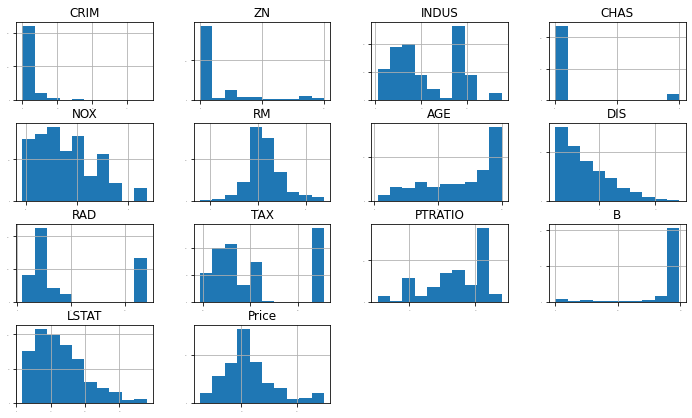

In [10]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,\
figsize=(12,7))
pyplot.show()

#### Multivariate plot: correlation matrix plot

<AxesSubplot:title={'center':'Correlation Matrix'}>

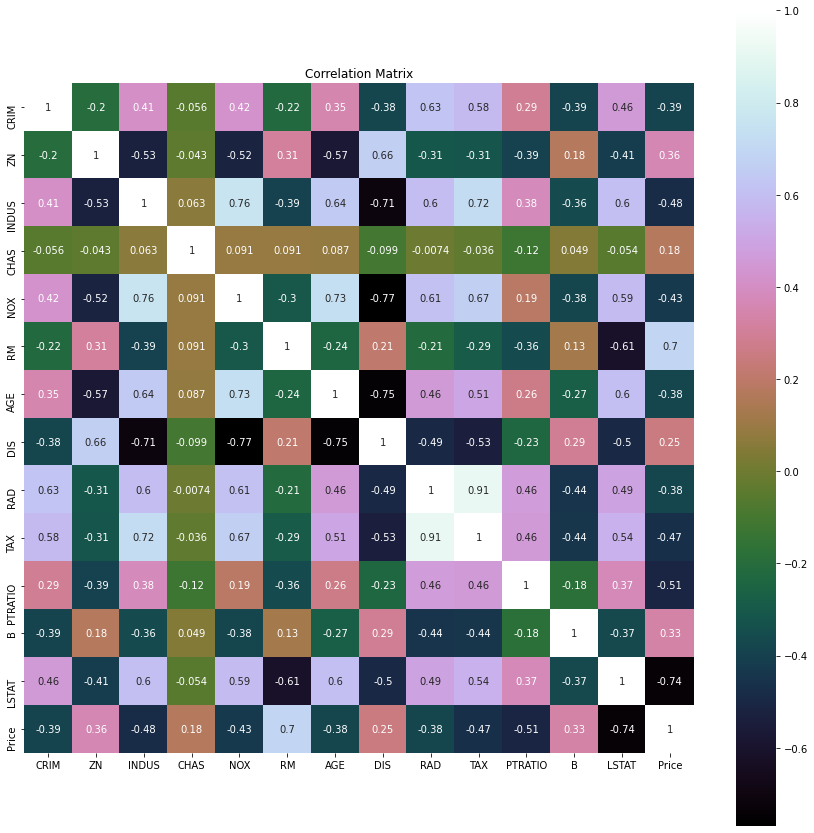

In [11]:
correlation = data.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

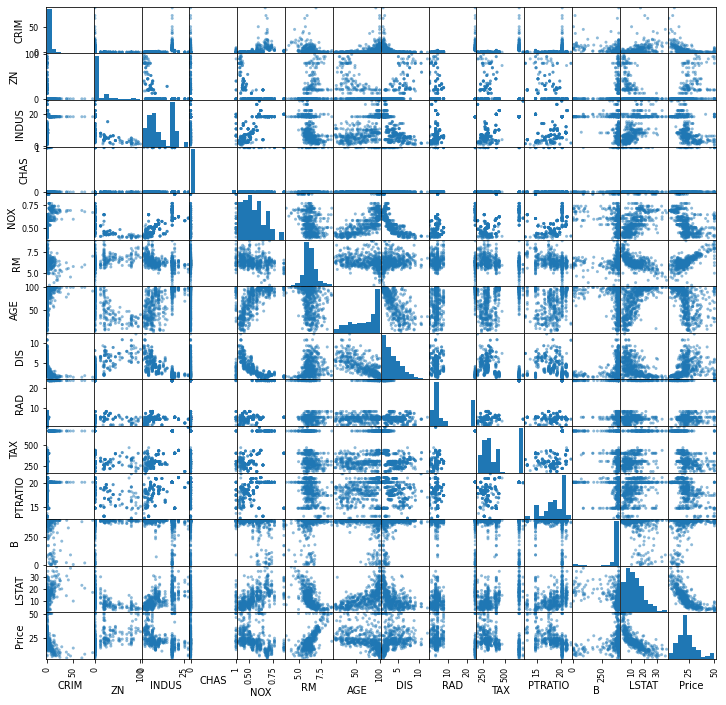

In [12]:
pyplot.figure(figsize=(15,15))
scatter_matrix(data,figsize=(12,12))
pyplot.show()

#  Data preparation

This step typically involves data processing, data cleaning, looking at feature impor‐
tance, and performing feature reduction. The data obtained for this case study is rela‐
tively clean and doesn’t require further processing. Feature reduction might be useful
here, but given the relatively small number of variables considered, we will keep all of
them as is. We will demonstrate data preparation in some of the subsequent case
studies in detail.

In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Slicing Dataset

In [14]:
X = data.loc[:,['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
Y = data.loc[:,['Price']]
print(Y.shape)
print(X.shape)

(506, 1)
(506, 13)


# # Scaling Dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))



#  Evaluate models

### Train-test split and evaluation metrics.

In [16]:
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test =\
train_test_split(rescaledX, Y, test_size=validation_size, random_state=seed)


### Test options and evaluation metrics. 

To optimize the various hyperparameters of
the models, we use ten-fold cross validation (CV) and recalculate the results ten times
to account for the inherent randomness in some of the models and the CV process.
We will evaluate algorithms using the mean squared error metric. This metric gives
an idea of the performance of the supervised regression models.

In [17]:
num_folds = 10
scoring = 'neg_mean_squared_error'


### Compare models and algorithms. 

Now that we have completed the data loading and
designed the test harness, we need to choose a model.

### Machine learning models from Scikit-learn.

In this step, the supervised regression
models are implemented using the sklearn package:


#### Regression and tree regression algorithms

In [18]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [19]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('DTR', DecisionTreeRegressor()),
 ('SVR', SVR())]

#### Neural network algorithms


In [20]:
models.append(('MLP', MLPRegressor()))

#### Ensemble models

In [21]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))


In [22]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('DTR', DecisionTreeRegressor()),
 ('SVR', SVR()),
 ('MLP', MLPRegressor()),
 ('ABR', AdaBoostRegressor()),
 ('GBR', GradientBoostingRegressor()),
 ('RFR', RandomForestRegressor()),
 ('ETR', ExtraTreesRegressor())]

Once we have selected all the models, we loop over each of them. First, we run the kfold analysis. Next, we run the model on the entire training and testing dataset.

All the algorithms use default tuning parameters. We will calculate the mean and
standard deviation of the evaluation metric for each algorithm and collect the results
for model comparison later:

In [23]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 100)
    #converted mean squared error to positive. The lower the better
    cv_results = -1*cross_val_score(model, X_train, Y_train, cv=kfold, \
    scoring=scoring)  # .values will give the values in a numpy array (shape: (n,1))  
    #.ravel will convert that array shape to (n, ) (i.e. flatten it)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train.values.ravel())
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

c:\python\python391\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\python\python391\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\python\python391\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\python\python391\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\python\python391\lib\site-packages\sklearn\neural_network\_mul

In [57]:
kfold_results

[array([19.03493184, 14.99137574, 12.21098762, 11.91522487, 15.58629202,
        39.62383849, 15.28531962, 30.42743359, 22.43948299, 33.44158488]),
 array([ 69.77214792,  38.51705127,  23.97707888,  37.41423581,
         68.38792512,  98.5646278 ,  76.66418724, 106.53920883,
         58.14903185,  73.27076105]),
 array([ 78.16578442,  44.78391342,  28.62333788,  43.34940513,
         75.98791401, 107.38266238,  82.39495142, 112.92309195,
         63.94495522,  82.41372101]),
 array([19.96083902, 16.74160976,  9.62051707,  7.57685854, 23.13102   ,
        79.79991   , 23.40749   , 24.03021   , 16.57273   , 30.1526    ]),
 array([40.36195122, 20.61804878, 22.37707317, 13.00390244, 14.31      ,
        25.50475   ,  6.96025   , 79.24125   , 33.87275   , 23.495     ]),
 array([37.56218219, 21.33654013, 11.02704521,  9.7985221 , 33.32353752,
        75.23681922, 37.89334051, 40.4995934 , 29.86519764, 43.67814659]),
 array([ 72.93042188,  47.24739321,  30.15286652,  47.63588152,
         84.

#### Let’s compare the algorithms by looking at the cross validation results:

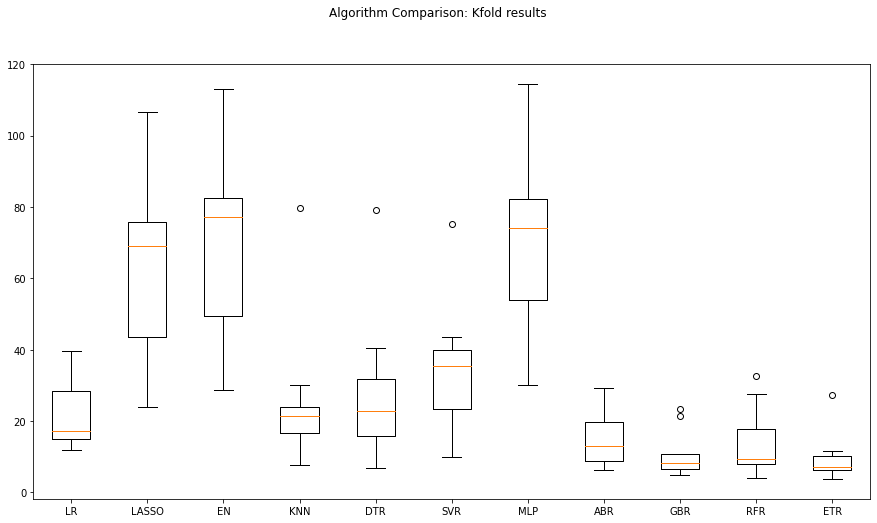

In [58]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

Although the results of a couple of the models look good, we see that the linear
regression and the regularized regression including the lasso regression (LASSO), CART, ABR, GBR, RFR, ETR and
elastic net (EN) seem to perform best. This indicates a strong linear relationship
between the dependent and independent variables. Going back to the exploratory
analysis, we saw a good correlation and linear relationship of the target variables with
the different lagged MSFT variables.

#### Let us look at the errors of the test set as well:


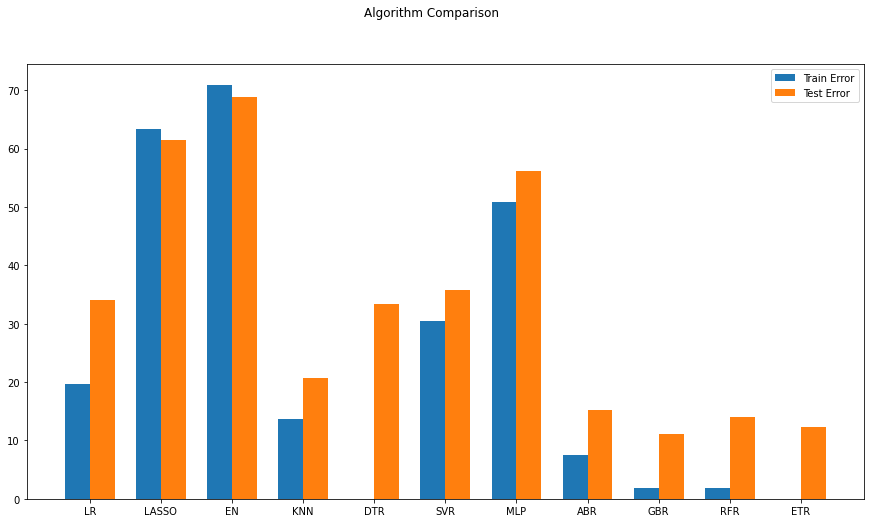

In [59]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Examining the training and test error, we still see a stronger performance from the
linear models. Some of the algorithms, such asETR, GBR, RFR
overfit on the training data and produced high error on the test set. Ensemble
models such as gradient boosting regression (GBR) and random forest regression
(RFR) have low bias but high variance. We also see that the artificial neural network
algorithm (shown as MLP in the chart) shows higher errors in both the training and
test sets. This is perhaps due to the linear relationship of the variables not captured
accurately by ANN, improper hyperparameters, or insufficient training of the model.
Our original intuition from the cross validation results and the scatterplots also seem
to demonstrate a better performance of linear models.


Since we got the lowest Test error in GBR, So we will build final model by using GBR.

# Prediction of Housing Price by using Final Selected Model

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
model_final = GradientBoostingRegressor()
res_final = model_final.fit(X_train, Y_train.values.ravel())
train_rme = mean_squared_error(res.predict(X_train), Y_train)
print("Traing RME : ", train_rme)
prediction = res_final.predict(X_test)
print("Test RME is: ", mean_squared_error(res_final.predict(X_test), Y_test))
print("r^2 is: ", r2_score(Y_test,prediction))


Traing RME :  1.0666473382889743e-27
Test RME is:  11.059167856242752
r^2 is:  0.863139714130881


In [104]:
preds_df_test = pd.DataFrame(zip(Y_test.values, prediction), columns = ["Actual", "Predicted"]).astype(float)
preds_df_test.head(10)

,Actual,Predicted
0,21.7,20.488139
1,18.5,19.282624
2,22.2,20.715270
3,20.4,20.734719
4,8.8,6.788986
5,8.3,9.639280
6,21.4,19.259756
7,23.6,23.461090
8,23.5,24.928237
9,19.0,14.686331


<AxesSubplot:>

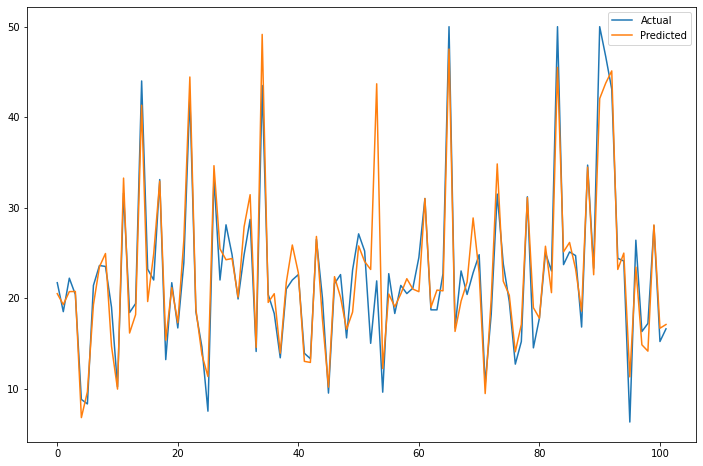

In [105]:
preds_df_test.plot(figsize = (12,8))